In [1]:
import pandas as pd
import numpy as np


For today's lecture we are going to use [Pima Indians Diabetes Dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) from the UCI Machine Learning Repository


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
#in original dataset, names of columns are missing. 
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
DataDiabetes = pd.read_csv(url, header=None, names=col_names)
DataDiabetes.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
DataDiabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Create Input and Output variables
X = DataDiabetes[['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']]
y = DataDiabetes['label']

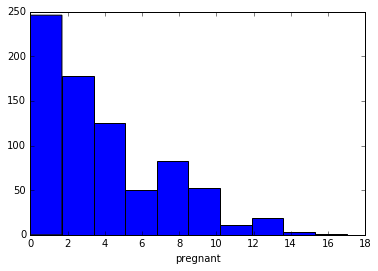

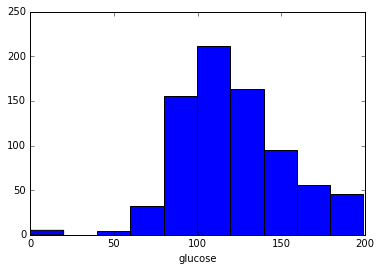

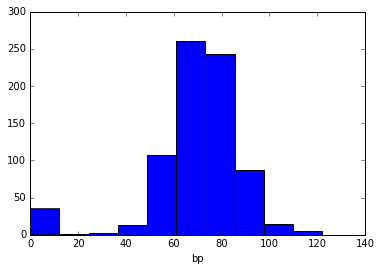

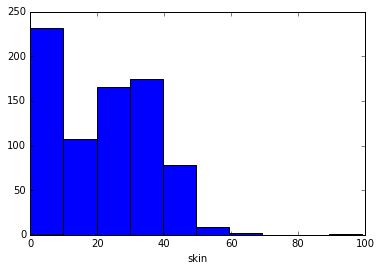

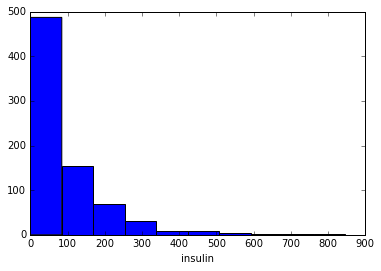

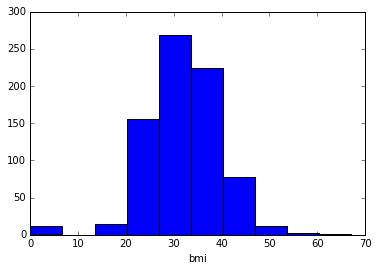

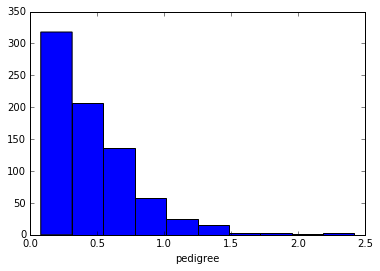

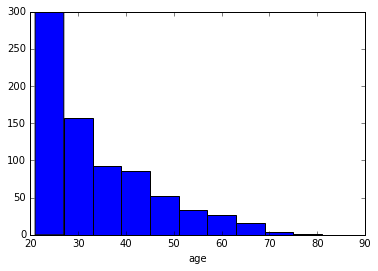

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
counter = 0
for i in ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']:
    plt.figure(i)
    plt.hist(DataDiabetes[i])
    plt.xlabel(i)

In [6]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [7]:
# import both Multinomial and Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics

In [8]:
# testing accuracy of Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)  

0.578125


Not good at all! If we randomly categorized every instance as 0 we would get a score of 65.2%. This is not surprising. Since we have continuous variables, GuassianNB will hopefully work better

In [9]:
# testing accuracy of Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)


0.71875


This is so much better. But wait! May be we can do even better. Did we have any missing values? Let's review DataFrame.describe() once more. Look at BMI for instance. Can somebody have zero BMI? It seems like NA values are replaced by zeros! We must get rid of them or impute the values. Imputation is hard so let's get rid of them!

In [10]:
DataDiabetes.drop(DataDiabetes.index[DataDiabetes.glucose == 0], inplace = True)
DataDiabetes.drop(DataDiabetes.index[DataDiabetes.skin == 0], inplace = True)
DataDiabetes.drop(DataDiabetes.index[DataDiabetes.bmi == 0], inplace = True)
DataDiabetes.drop(DataDiabetes.index[DataDiabetes.insulin == 0], inplace = True)

In [11]:
DataDiabetes.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class) 


0.609375


Does slightly better after getting rid of missing values - still worse than random guess.

In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)  

0.776041666667


GaussianNB performed so much better. Let's review histograms of our cleaned data. May be we can do something about negatively/positively skewed distributions.

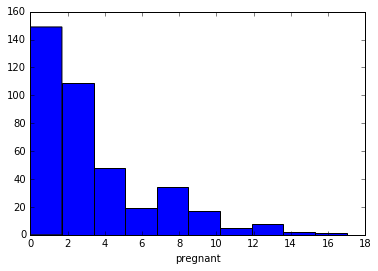

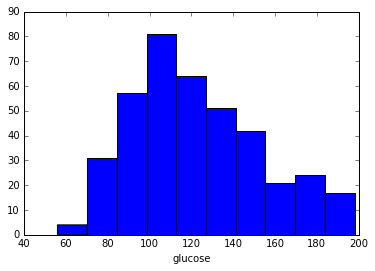

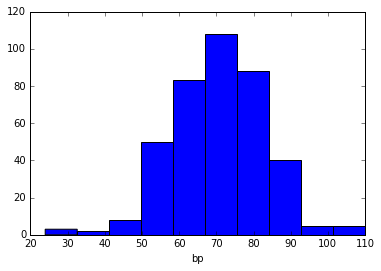

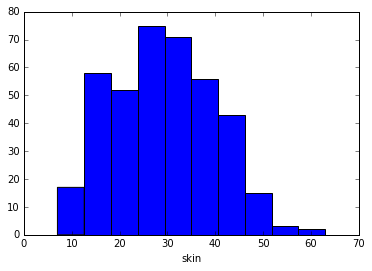

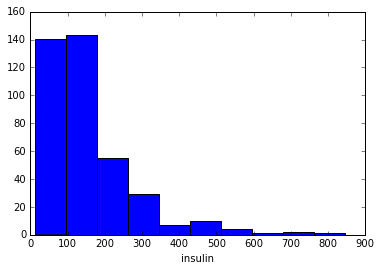

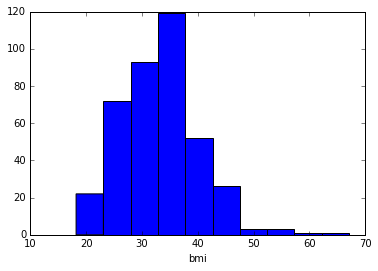

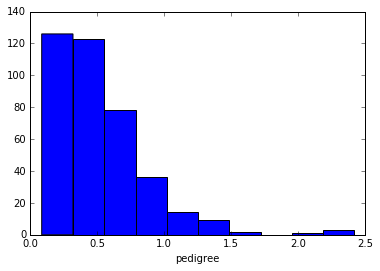

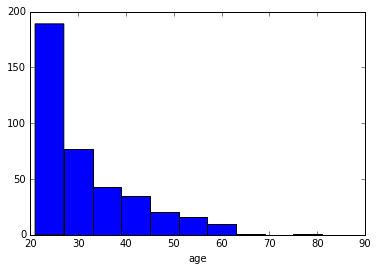

In [14]:
counter = 0
for i in ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']:
    plt.figure(i)
    plt.hist(DataDiabetes[i])
    plt.xlabel(i)

In [15]:
#So, let's log-transform our skewed data

DataDiabetes['pregnant']= np.log(1+DataDiabetes['pregnant'])
DataDiabetes['insulin']= np.log(1+DataDiabetes['insulin'])
DataDiabetes['age']= np.log(1+DataDiabetes['age'])
DataDiabetes['pedigree']= np.log(1+DataDiabetes['pedigree'])



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)  


0.78125


Transforming our skewed distributions helped a little bit. 

Here are documentations for [Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB), and [Bernoulli Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)